<a href="https://colab.research.google.com/github/YunTaeHyeon/AILab/blob/main/LH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [194]:
df_train=pd.read_csv('/content/drive/MyDrive/LHTrainTest/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/LHTrainTest/test.csv')

df_train


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


# 중식 메뉴 카테고리화 하기

In [195]:
train_list1=df_train['조식메뉴']

split_list1 = [element.split(' ') for element in train_list1] #스플릿

# Convert the list of lists to a numpy array
split_array1 = np.concatenate(split_list1) #스플릿한거 한줄로 넘파이로 만들어서 붙임
unique_array1=np.unique(split_array1) #중복되는거 날려버림
new_array1 = np.array([x for x in unique_array1 if all(word not in x for word in '(' )]) #포함하는 거 날려버리
new_array1 = np.array([x for x in new_array1 if all(word not in x for word in '<' )])
new_array1 = np.array([x for x in new_array1 if all(word not in x for word in '' )])
new_array1 = np.array([x for x in new_array1 if all(word not in x for word in '*' )])
print("조식 메뉴 가짓수: ",len(new_array1)) 


train_list2=df_train['중식메뉴']

split_list2 = [element.split(' ') for element in train_list2] #스플릿

# Convert the list of lists to a numpy array
split_array2 = np.concatenate(split_list2) #스플릿한거 한줄로 넘파이로 만들어서 붙임
unique_array2=np.unique(split_array2) #중복되는거 날려버림
new_array2 = np.array([x for x in unique_array2 if all(word not in x for word in '(' )]) #포함하는 거 날려버리
new_array2 = np.array([x for x in new_array2 if all(word not in x for word in '<' )])
new_array2 = np.array([x for x in new_array2 if all(word not in x for word in '' )])
new_array2 = np.array([x for x in new_array2 if all(word not in x for word in '*' )])
print("중식 메뉴 가짓수: ",len(new_array2)) 


train_list3=df_train['석식메뉴']

split_list3 = [element.split(' ') for element in train_list3] #스플릿

# Convert the list of lists to a numpy array
split_array3 = np.concatenate(split_list3) #스플릿한거 한줄로 넘파이로 만들어서 붙임
unique_array3=np.unique(split_array3) #중복되는거 날려버림
new_array3 = np.array([x for x in unique_array3 if all(word not in x for word in '(' )]) #포함하는 거 날려버리
new_array3 = np.array([x for x in new_array3 if all(word not in x for word in '<' )])
new_array3 = np.array([x for x in new_array3 if all(word not in x for word in '' )])
new_array3 = np.array([x for x in new_array3 if all(word not in x for word in '*' )])
print("석식 메뉴 가짓수: ",len(new_array3)) 
print(new_array3[:200])

조식 메뉴 가짓수:  766
중식 메뉴 가짓수:  1479
석식 메뉴 가짓수:  1548
['' '가래떡오븐구이' '가쓰오장국' '가자미구이' '가자미양념조림' '가자미양념찜' '가자미엿장구이' '가자미찜'
 '가자미카레튀김' '가자미튀김' '가정의날' '가지나물' '가지된장무침' '가지마파두부' '가지무침' '가쯔오국' '가쯔오장국'
 '간장계란장' '간장깻잎지' '간장깻잎지/콘샐러드' '간장마늘치킨' '간장불고기' '간장찜닭' '간장치킨' '갈릭파닭' '갈비만두'
 '갈치구이' '갈치무조림' '갈치양념조림' '갈치조림' '갈치카레구이' '갈치튀김' '감자간장조림' '감자고추장찌개' '감자국'
 '감자만두' '감자만두/샐러드' '감자만두국' '감자버터구이' '감자범벅' '감자범벅/무피클' '감자범벅/양배추샐러드'
 '감자범벅/오이피클' '감자범벅/피클' '감자비엔나볶음' '감자샐러드' '감자소세지볶음' '감자양념조림' '감자양파국' '감자전'
 '감자찌개' '감자채볶음' '감자채카레볶음' '감자채파프리카볶음' '감자채햄볶음' '감자치즈구이' '감자치즈오븐구이'
 '감자카레볶음' '감자튀김' '감자튀김/무피클' '감자튀김/피클' '감자프리타타' '감자햄조림' '갓김치' '갓김치/겉절이김치'
 '개성감자만두' '건도토리묵파프리카볶음' '건새우마늘쫑볶음' '건새우아욱국' '건새우아욱된장국' '건새우호박채전' '건파래무침'
 '건파래볶음' '검정콩조림' '검정콩조림/귤' '겉절이김치' '겨울초겉절이' '견과류조림' '계란국' '계란김밥' '계란떡볶이'
 '계란말이' '계란볶음밥' '계란야채말이' '계란장조림' '계란찜' '계란파국' '계란후라이' '계란후라이/요구르트' '계발의'
 '고갈비구이' '고구마그라탕' '고구마떡볶이' '고구마맛탕' '고구마맛탕/오렌지' '고구마범벅' '고구마범벅/무피클'
 '고구마샐러드' '고구마순나물' '고구마순들깨볶음' '고구마순볶음' '고구마연근맛탕' '고구마오븐구이' '고구마치즈구이'
 '고구마치즈돈까스' '고구마튀김' '고구마튀김

# 연도 별로 나눠보기

In [196]:
train_list=df_train[:229] #1월 데이터 없음
print("2016년 평균: ",train_list['중식계'].mean())

train_list=df_train[229:473]
print("2017년 평균: ",train_list['중식계'].mean())

train_list=df_train[473:712]
print("2018년 평균: ",train_list['중식계'].mean())

train_list=df_train[712:958]
print("2019년 평균: ",train_list['중식계'].mean())

train_list=df_train[958:995] #대구 코로나 사태 전
print("2020년 코로나 이전: ",train_list['중식계'].mean())

train_list=df_train[995:] #대쿠 코로나 사태 후
print("2020년 코로나 이후: ",train_list['중식계'].mean())

#코로나가 생각보다 의미가 있는 것 같지는 않다?
#사람이 많아져서 그런건가?
#내일 출장인원 이런거까지 계산해서 해보기

2016년 평균:  934.7510917030568
2017년 평균:  896.4549180327868
2018년 평균:  883.020920502092
2019년 평균:  848.7276422764228
2020년 코로나 이전:  896.2162162162163
2020년 코로나 이후:  890.8142857142857


# 요일별로 나누어 보기

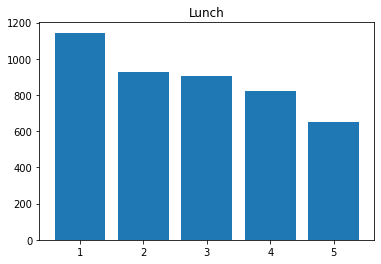

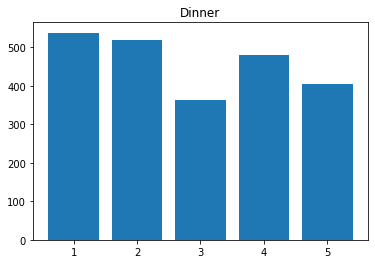

In [197]:
#mon tue wed thu fri sat sun
mon=df_train[df_train["요일"]=="월"]
tue=df_train[df_train["요일"]=="화"]
wed=df_train[df_train["요일"]=="수"]
thu=df_train[df_train["요일"]=="목"]
fri=df_train[df_train["요일"]=="금"]

#print(len(df_train)-len(mon)-len(tue)-len(wed)-len(thu)-len(fri)) #주말은 하루도 없는 것 확인

x=np.arange(5)

xvalue=[1,2,3,4,5]
yvalue=[int(mon["중식계"].mean()),int(tue["중식계"].mean()),int(wed["중식계"].mean()),int(thu["중식계"].mean()),int(fri["중식계"].mean())]

plt.title("Lunch")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show() #매우 유의미함

x=np.arange(5)

xvalue=[1,2,3,4,5]
yvalue=[int(mon["석식계"].mean()),int(tue["석식계"].mean()),int(wed["석식계"].mean()),int(thu["석식계"].mean()),int(fri["석식계"].mean())]

plt.title("Dinner")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show() #매우 유의미함

# 월말 월초, 연말 연초에 따른 분석

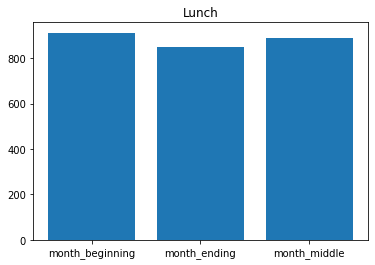

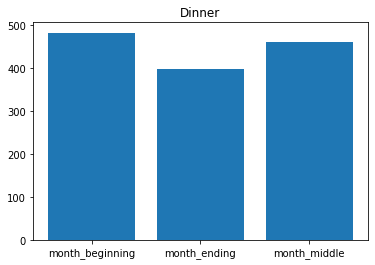

In [198]:
from numpy.core.numeric import outer
df_train['일자'] = pd.to_datetime(df_train['일자'])

# Extract the day component of the dates
df_train['일자'] = df_train['일자'].dt.day

# Print the updated DataFrame
month_beginning=[df_train[df_train['일자']==1],df_train[df_train['일자']==2],df_train[df_train['일자']==3],df_train[df_train['일자']==4],df_train[df_train['일자']==5]]
month_ending=[df_train[df_train['일자']==31],df_train[df_train['일자']==30],df_train[df_train['일자']==29],df_train[df_train['일자']==28],df_train[df_train['일자']==27],df_train[df_train['일자']==26]]

for i in range(5):
  month_middle=pd.merge(df_train,month_beginning[i],how='outer')
  month_middle=pd.merge(df_train,month_ending[i],how='outer')

month_middle=pd.merge(df_train,month_ending[5],how='outer')



x=np.arange(3)

xvalue=["month_beginning","month_ending","month_middle"]
yvalue=[(month_beginning[0]['중식계'].mean()+month_beginning[1]['중식계'].mean()+month_beginning[2]['중식계'].mean()+month_beginning[3]['중식계'].mean()+month_beginning[4]['중식계'].mean())/5,
        (month_ending[0]['중식계'].mean()+month_ending[1]['중식계'].mean()+month_ending[2]['중식계'].mean()+month_ending[3]['중식계'].mean()+month_ending[4]['중식계'].mean()+month_ending[5]['중식계'].mean())/6,
        month_middle['중식계'].mean()]

plt.title("Lunch")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show()

#월말이 좀 낮음

xvalue=["month_beginning","month_ending","month_middle"]
yvalue=[(month_beginning[0]['석식계'].mean()+month_beginning[1]['석식계'].mean()+month_beginning[2]['석식계'].mean()+month_beginning[3]['석식계'].mean()+month_beginning[4]['석식계'].mean())/5,
        (month_ending[0]['석식계'].mean()+month_ending[1]['석식계'].mean()+month_ending[2]['석식계'].mean()+month_ending[3]['석식계'].mean()+month_ending[4]['석식계'].mean()+month_ending[5]['석식계'].mean())/6,
        month_middle['석식계'].mean()]

plt.title("Dinner")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show()

#마찬가지로 월말이 좀 낮음

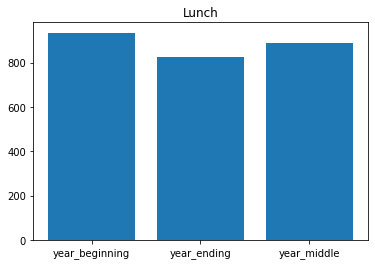

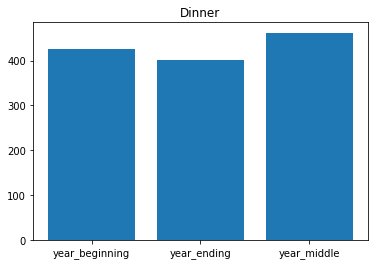

In [200]:
df_train=pd.read_csv('/content/drive/MyDrive/LHTrainTest/train.csv')

df_train['일자'] = pd.to_datetime(df_train['일자'])

# Extract the day component of the dates
df_train['일자'] = df_train['일자'].dt.month

# Print the updated DataFrame
year_beginning=df_train[df_train['일자']==1]
year_ending=df_train[df_train['일자']==12]

year_middle=pd.merge(df_train,year_beginning,how='outer')
year_middle=pd.merge(df_train,year_ending,how='outer')


x=np.arange(3)

xvalue=["year_beginning","year_ending","year_middle"]
yvalue=[year_beginning['중식계'].mean(),
        year_ending['중식계'].mean(),
        year_middle['중식계'].mean()]

plt.title("Lunch")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show()

#연말이 좀 낮음

xvalue=["year_beginning","year_ending","year_middle"]
yvalue=[year_beginning['석식계'].mean(),
        year_ending['석식계'].mean(),
        year_middle['석식계'].mean()]

plt.title("Dinner")
plt.xticks(x,xvalue)
plt.bar(x,yvalue)

plt.show()

# 출장 인원 등 빼버리기